In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from typing import List, Dict, Tuple
plt.rcParams["figure.figsize"] = (15, 10)


In [23]:
"""Reading the training data"""
train_dfs: List[pd.DataFrame] = []
for i in range(1, 11):
    train_dfs.append(pd.read_csv(f"sample{i}.csv", header=None))


In [24]:
"""Reading the test data"""
test_df: pd.DataFrame = pd.read_csv("test.csv", header=None)


In [25]:
"""Dividing the training data into X and y"""
train_dfs_xs: List[np.ndarray] = []
train_dfs_ys: List[np.ndarray] = []
for train_df in train_dfs:
    train_dfs_xs.append(train_df.iloc[:, :-1].to_numpy())
    train_dfs_ys.append(train_df.iloc[:, -1].to_numpy())


In [26]:
"""Dividing the test data into X and y"""
test_df_xs: np.ndarray = test_df.iloc[:, :-1].to_numpy()
test_df_ys: np.ndarray = test_df.iloc[:, -1].to_numpy()


In [27]:
"""Defining the gaussian kernel function"""


def gaussian_kernel(u: float) -> float:
    return np.exp(u ** 2 / -2) / np.sqrt(2 * np.pi)


In [28]:
"""Write a kernel smoother function which uses the gaussian kernel function"""


def kernel_smoother(test_x: float, train_xs: np.ndarray, train_ys: np.ndarray, sigma: float) -> float:
    """
    :param test_x: The test point
    :param train_xs: The training points
    :param train_ys: The training labels
    :param sigma: The sigma value
    :return: The predicted value
    """
    numerator: float = np.sum([gaussian_kernel(
        (test_x - train_x) / sigma) * train_y for train_x, train_y in zip(train_xs, train_ys)])
    denominator: float = np.sum(
        [gaussian_kernel((test_x - train_x) / sigma) for train_x in train_xs])
    return numerator / denominator


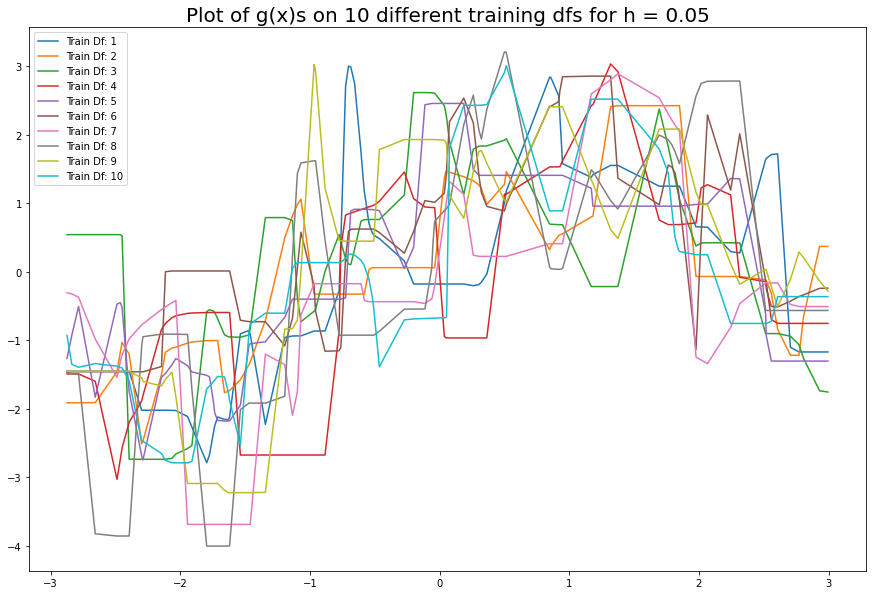

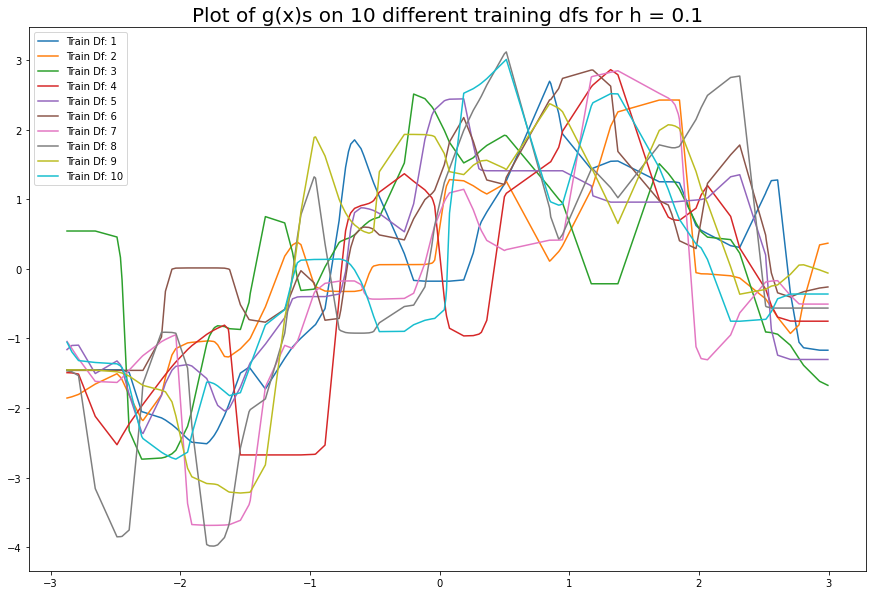

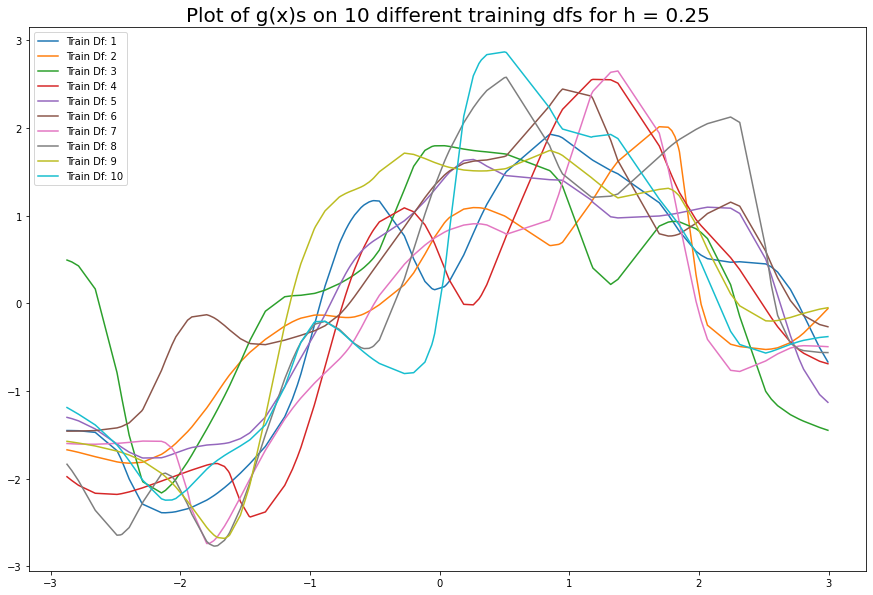

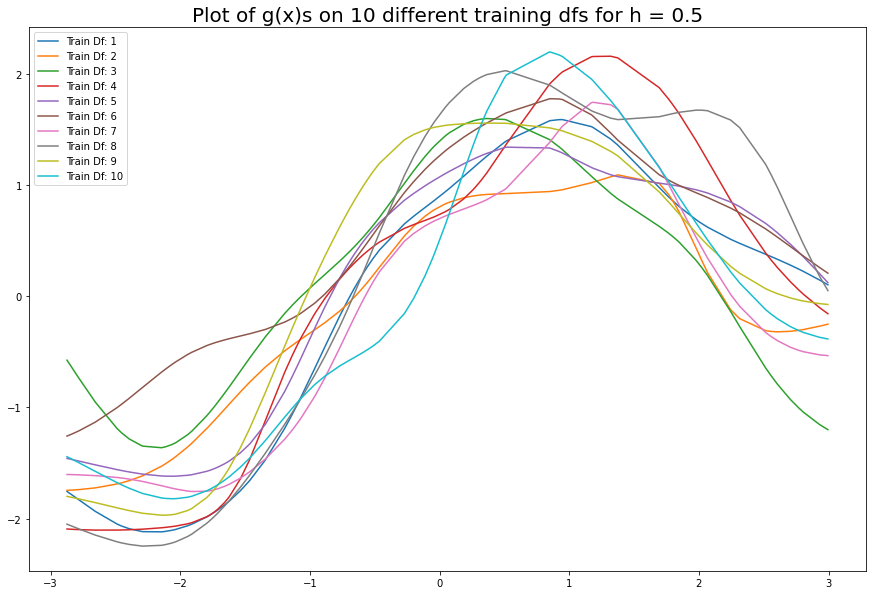

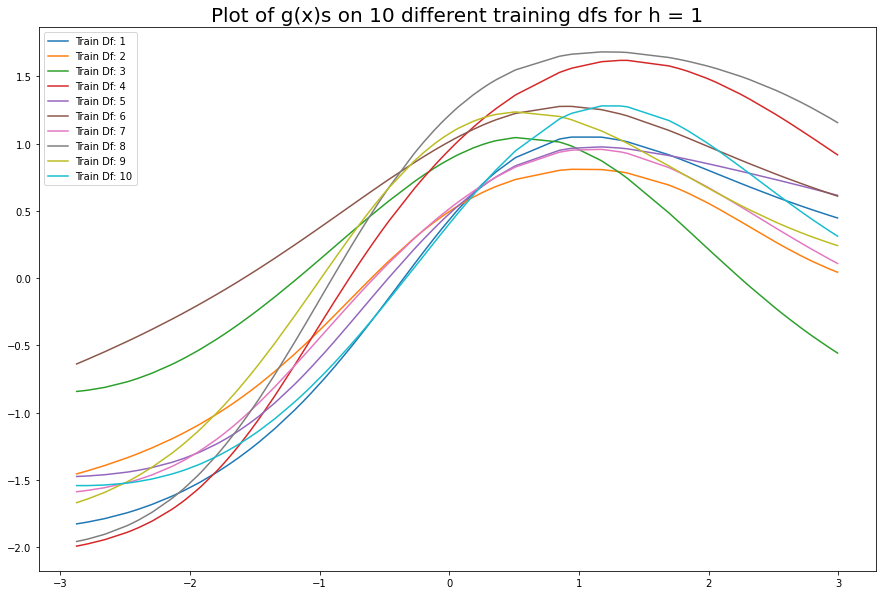

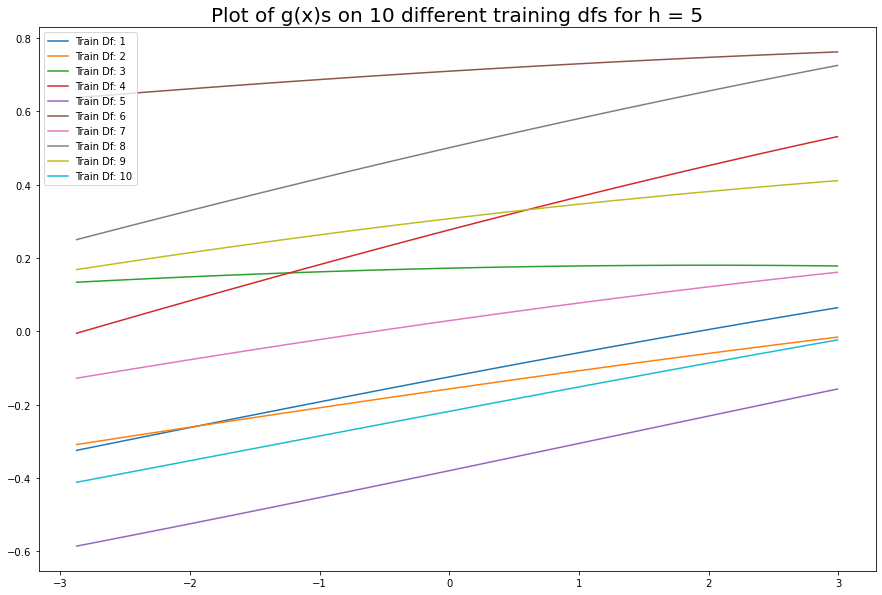

In [29]:

"""Write a function which uses the kernel smoother function to predict the test labels"""
mse_of_train_dfs_by_sigma: Dict[str, List[Tuple[float, float]]] = {
    f"{i}": [] for i in range(1, 11)}
# {'train_df number': [(sigma1, mse1), (sigma2, mse2), ...]}
sigma_values: List[float] = [0.05, 0.1, 0.25, 0.5, 1, 5]

"""Main algorithm"""
for sigma in sigma_values:
    """Calculating mse values for each sigma value"""
    for idx, (train_df_xs, train_df_ys) in enumerate(zip(train_dfs_xs, train_dfs_ys), start=1):
        predictions: List[float] = []
        for test_df_x, test_df_y in zip(test_df_xs, test_df_ys):
            prediction: float = kernel_smoother(
                test_df_x, train_df_xs, train_df_ys, sigma)
            predictions.append(prediction)
        error: float = mean_squared_error(test_df_ys, predictions)
        mse_of_train_dfs_by_sigma[str(idx)].append((sigma, error))

        """Plotting the mse values of every train_dfs for each sigma value"""

        plt.title(
            f"Plot of g(x)s on 10 different training dfs for h = {sigma}", fontsize=20)
        plt.plot(test_df_xs, predictions, label=f"Train Df: {idx}")
        plt.legend(loc='upper left')
    plt.show()


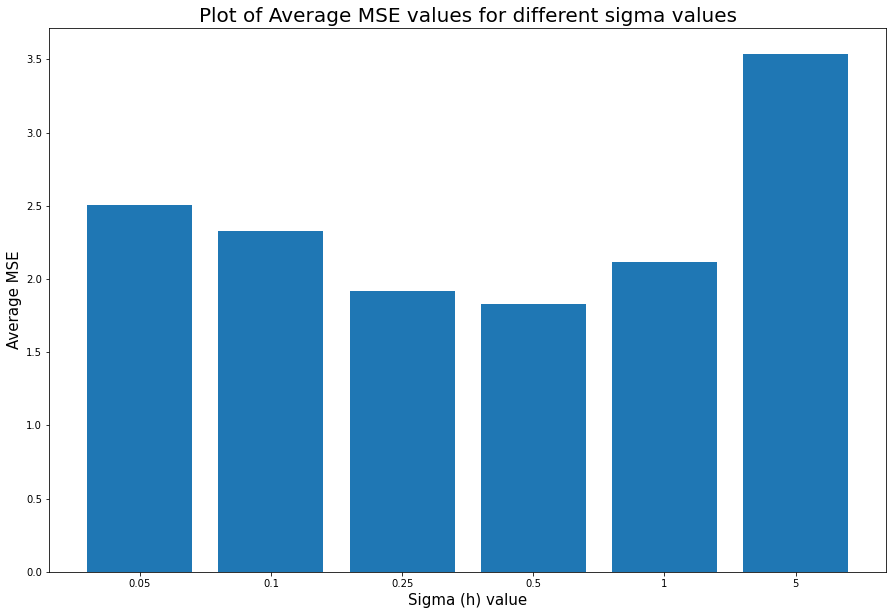

In [30]:
mse_values_by_sigma: Dict[float, List[float]] = {
    sigma: [] for sigma in sigma_values}

for sigma_mse_list in mse_of_train_dfs_by_sigma.values():
    for sigma, mse in sigma_mse_list:
        mse_values_by_sigma[sigma].append(mse)

plt.title(f"Plot of Average MSE values for different sigma values", fontsize=20)
plt.bar(range(6), [np.mean(mses) for mses in mse_values_by_sigma.values()])
plt.xticks(range(6), sigma_values)
plt.xlabel('Sigma (h) value', fontsize=15)
plt.ylabel('Average MSE', fontsize=15)
plt.show()
